## Q13 MAX-MIN Filter

MAX-MIN 滤波器使用网格内像素的最大值和最小值的差值对网格内像素重新赋值。通常用于**边缘检测**。
边缘检测用于检测图像中的线。像这样提取图像中的信息的操作被称为特征提取。边缘检测通常在**灰度图像**上进行

## Q14 微分滤波器
微分滤波器对图像亮度急剧变化的边缘有提取效果，可以获得邻接像素的差值

```
    (a)纵向         (b)横向
      0 -1  0            0 0 0
K = [ 0  1  0 ]   K = [ -1 1 0 ]
      0  0  0            0 0 0
```



https://www.cnblogs.com/denny402/p/5125253.html

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

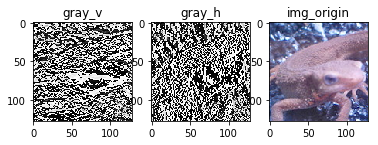

In [16]:
img = cv2.imread("gg.jpg")
img_origin = img.copy()

"""
@description: filter method to feature extraction and edge detection
:param FILTER_MODE -> MAX_MIN \ Differential
"""

B = img[..., 0].copy()
G = img[..., 1].copy()
R = img[..., 2].copy()

(H, W, C) = img.shape

# Gray scale
gray = 0.2126 * R + 0.7152 * G + 0.0722 * B
gray = gray.astype(np.uint8)
gray_v = gray.copy()
gray_h = gray.copy()

# filter setting
FILTER_MODE = "Differential"
filter_kernel_size = 3

# zero padding
padding = filter_kernel_size // 2 # //表示整除，向下取整
img_padding = np.zeros((H + padding*2, W + padding*2), dtype=np.float)
img_padding[padding: padding + H, padding: padding + W] = gray.copy().astype(np.float)


# create filter kernel 
if FILTER_MODE == "Differential":
    ## Sobel vertical
    Kv = [[0., -1., 0.],[0., 1., 0.],[0., 0., 0.]]
    ## Sobel horizontal
    Kh = [[0., 0., 0.],[-1., 1., 0.], [0., 0., 0.]]

# filter processing
for h in range(H):
    for w in range(W):
        if  FILTER_MODE == "MAX_MIN":
            gray[h, w] = np.max(img_padding[h : h + filter_kernel_size, w : w + filter_kernel_size]) - \
                         np.min(img_padding[h : h + filter_kernel_size, w : w + filter_kernel_size])
        if FILTER_MODE == "Differential":
            gray_v[h, w] = np.sum(img_padding[h : h + filter_kernel_size, w : w + filter_kernel_size]  *  Kv)
            gray_h[h, w] = np.sum(img_padding[h : h + filter_kernel_size, w : w + filter_kernel_size]  *  Kh)

gray = gray.astype(np.uint8)
gray_v = gray_v.astype(np.uint8)
gray_h = gray_h.astype(np.uint8)

img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)

gray_v[gray_v < 0] = 0
gray_h[gray_h < 0] = 0
gray_v[gray_v > 255] = 255
gray_h[gray_h > 255] = 255

if  FILTER_MODE == "MAX_MIN":
    plt.figure()
    plt.subplot(121)
    plt.imshow(gray, cmap = 'gray')
    plt.title(FILTER_MODE)
    plt.subplot(122)
    plt.imshow(img_origin)
    plt.title("img_origin")
    plt.show()
if FILTER_MODE == "Differential":
    plt.figure()
    plt.subplot(131)
    plt.imshow(gray_v, cmap = 'gray')
    plt.title("gray_v")
    plt.subplot(132)
    plt.imshow(gray_h, cmap = 'gray')
    plt.title("gray_h")
    plt.subplot(133)
    plt.imshow(img_origin)
    plt.title("img_origin")
    plt.show()